# Sfida: Analizzare un Testo sulla Scienza dei Dati

In questo esempio, faremo un semplice esercizio che copre tutti i passaggi di un processo tradizionale di scienza dei dati. Non è necessario scrivere alcun codice, puoi semplicemente cliccare sulle celle qui sotto per eseguirle e osservare il risultato. Come sfida, ti incoraggiamo a provare questo codice con dati diversi.

## Obiettivo

In questa lezione, abbiamo discusso diversi concetti legati alla Scienza dei Dati. Proviamo a scoprire più concetti correlati facendo un po' di **text mining**. Partiremo da un testo sulla Scienza dei Dati, estrarremo parole chiave da esso e poi cercheremo di visualizzare il risultato.

Come testo, utilizzerò la pagina sulla Scienza dei Dati da Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Passaggio 1: Ottenere i Dati

Il primo passo in ogni processo di data science è ottenere i dati. Utilizzeremo la libreria `requests` per farlo:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Passaggio 2: Trasformare i dati

Il passo successivo è convertire i dati in una forma adatta per l'elaborazione. Nel nostro caso, abbiamo scaricato il codice sorgente HTML dalla pagina e dobbiamo convertirlo in testo semplice.

Ci sono molti modi per farlo. Utilizzeremo l'oggetto [HTMLParser](https://docs.python.org/3/library/html.parser.html) integrato di Python, che è il più semplice. Dobbiamo creare una sottoclasse della classe `HTMLParser` e definire il codice che raccoglierà tutto il testo all'interno dei tag HTML, escludendo i tag `<script>` e `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Passaggio 3: Ottenere informazioni

Il passo più importante è trasformare i nostri dati in una forma da cui possiamo trarre informazioni utili. Nel nostro caso, vogliamo estrarre parole chiave dal testo e vedere quali di queste sono più significative.

Utilizzeremo una libreria Python chiamata [RAKE](https://github.com/aneesha/RAKE) per l'estrazione delle parole chiave. Per prima cosa, installiamo questa libreria nel caso in cui non sia già presente:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


La funzionalità principale è disponibile dall'oggetto `Rake`, che possiamo personalizzare utilizzando alcuni parametri. Nel nostro caso, imposteremo la lunghezza minima di una parola chiave a 5 caratteri, la frequenza minima di una parola chiave nel documento a 3 e il numero massimo di parole in una parola chiave a 2. Sentiti libero di sperimentare con altri valori e osservare il risultato.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Abbiamo ottenuto un elenco di termini insieme al relativo grado di importanza. Come puoi vedere, le discipline più rilevanti, come machine learning e big data, sono presenti nelle prime posizioni della lista.

## Passaggio 4: Visualizzare il Risultato

Le persone interpretano meglio i dati in forma visiva. Pertanto, spesso ha senso visualizzare i dati per trarre alcune intuizioni. Possiamo utilizzare la libreria `matplotlib` in Python per tracciare una semplice distribuzione delle parole chiave con la loro rilevanza:


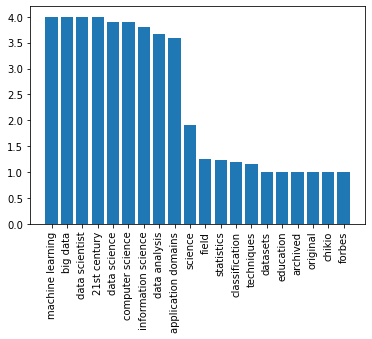

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

C'è, tuttavia, un modo ancora migliore per visualizzare le frequenze delle parole - usando **Word Cloud**. Avremo bisogno di installare un'altra libreria per tracciare la word cloud dalla nostra lista di parole chiave.


In [71]:
!{sys.executable} -m pip install wordcloud

L'oggetto `WordCloud` è responsabile di accettare sia il testo originale, sia una lista pre-calcolata di parole con le loro frequenze, e restituisce un'immagine, che può essere poi visualizzata utilizzando `matplotlib`:


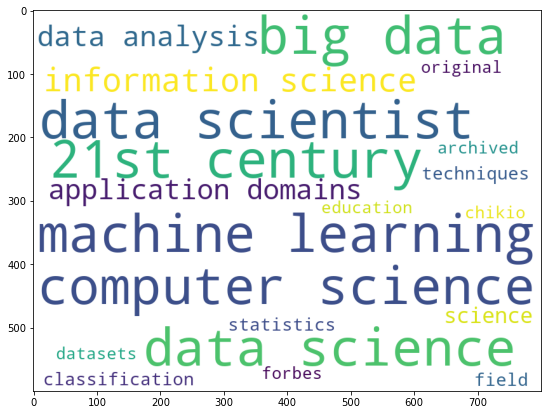

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Possiamo anche passare il testo originale a `WordCloud` - vediamo se riusciamo a ottenere un risultato simile:


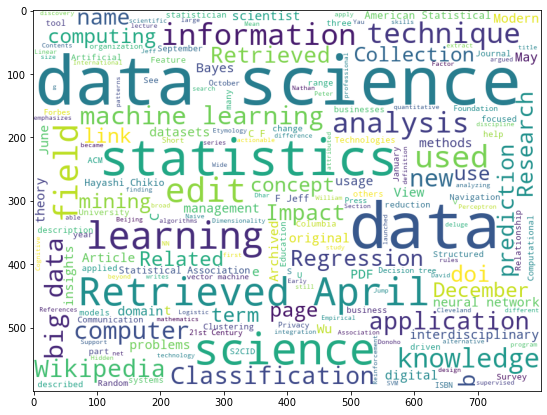

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Puoi vedere che la word cloud ora appare più impressionante, ma contiene anche molto rumore (ad esempio, parole non correlate come `Retrieved on`). Inoltre, otteniamo meno parole chiave composte da due termini, come *data scientist* o *computer science*. Questo accade perché l'algoritmo RAKE fa un lavoro molto migliore nel selezionare buone parole chiave dal testo. Questo esempio illustra l'importanza della pre-elaborazione e pulizia dei dati, poiché avere un quadro chiaro alla fine ci permetterà di prendere decisioni migliori.

In questo esercizio abbiamo seguito un processo semplice per estrarre un significato da un testo di Wikipedia, sotto forma di parole chiave e word cloud. Questo esempio è piuttosto semplice, ma dimostra bene tutti i passaggi tipici che un data scientist affronta quando lavora con i dati, partendo dall'acquisizione dei dati fino alla visualizzazione.

Nel nostro corso discuteremo tutti questi passaggi in dettaglio.



---

**Disclaimer**:  
Questo documento è stato tradotto utilizzando il servizio di traduzione automatica [Co-op Translator](https://github.com/Azure/co-op-translator). Sebbene ci impegniamo per garantire l'accuratezza, si prega di notare che le traduzioni automatiche possono contenere errori o imprecisioni. Il documento originale nella sua lingua nativa dovrebbe essere considerato la fonte autorevole. Per informazioni critiche, si raccomanda una traduzione professionale effettuata da un traduttore umano. Non siamo responsabili per eventuali incomprensioni o interpretazioni errate derivanti dall'uso di questa traduzione.
